## Pairs Trading - RV - Tech Sector

### Import Libraries

In [16]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.tsa.stattools as ts
import numpy as np
from statsmodels.tsa.stattools import adfuller

### Defining Data and Correlation Matrix

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<AxesSubplot:>

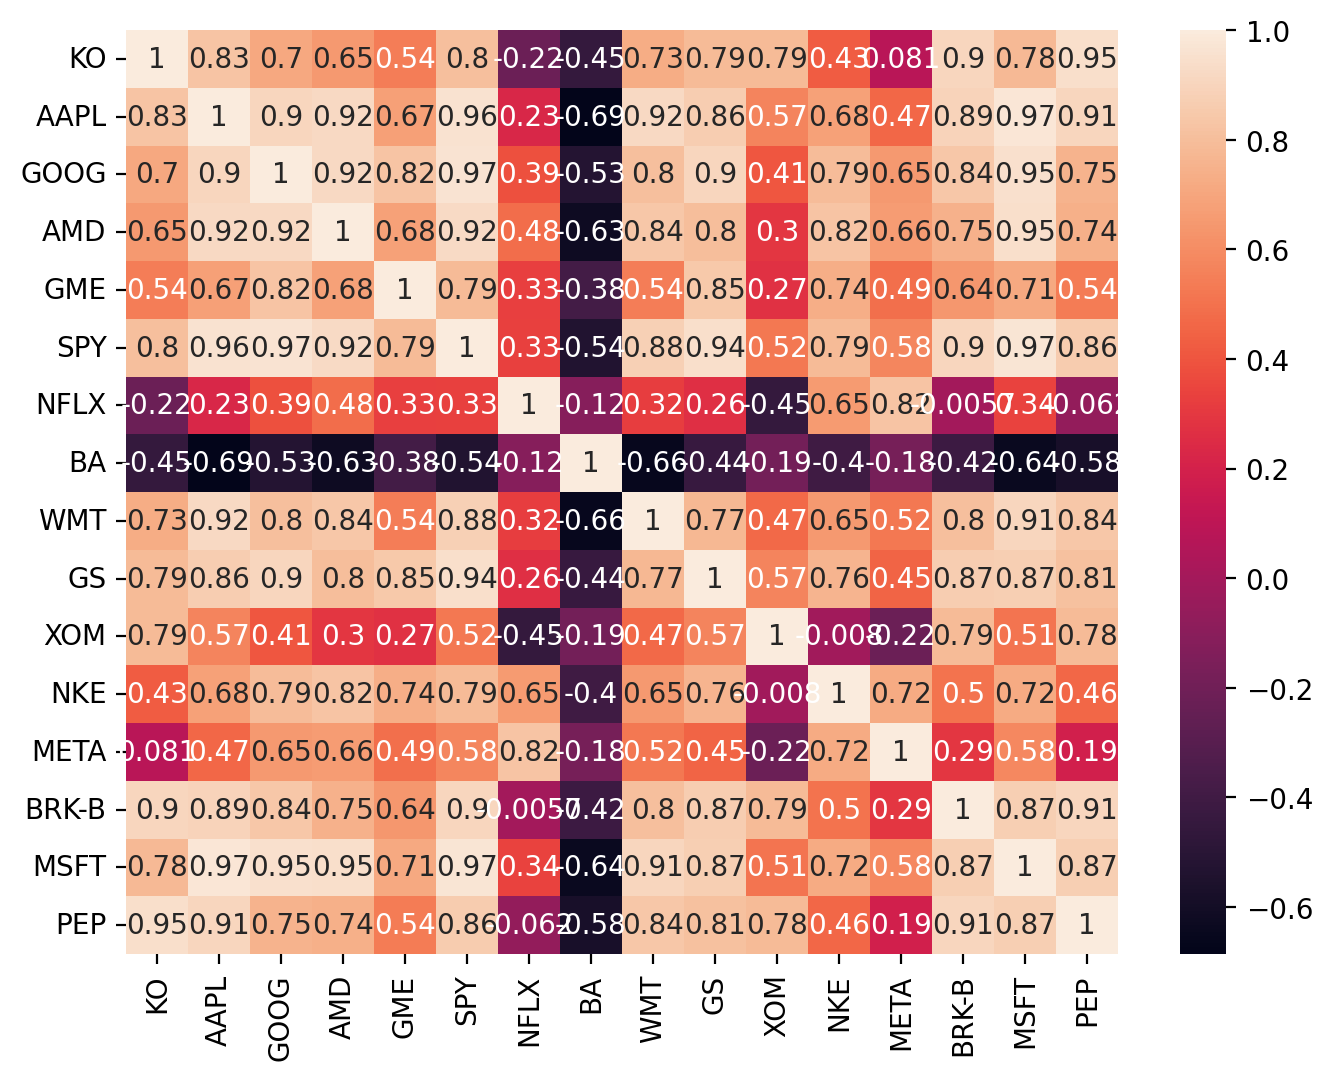

In [10]:
def get_historical_Data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2018, 10, 27), end=datetime(2023, 10, 27)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["KO", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","GS","XOM","NKE", "META","BRK-B", "MSFT", "PEP"]
d = get_historical_Data(ticks)
print(d.shape)
d.tail()

corr_matrix = d.corr()
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

### Defining Pairs & Correlation

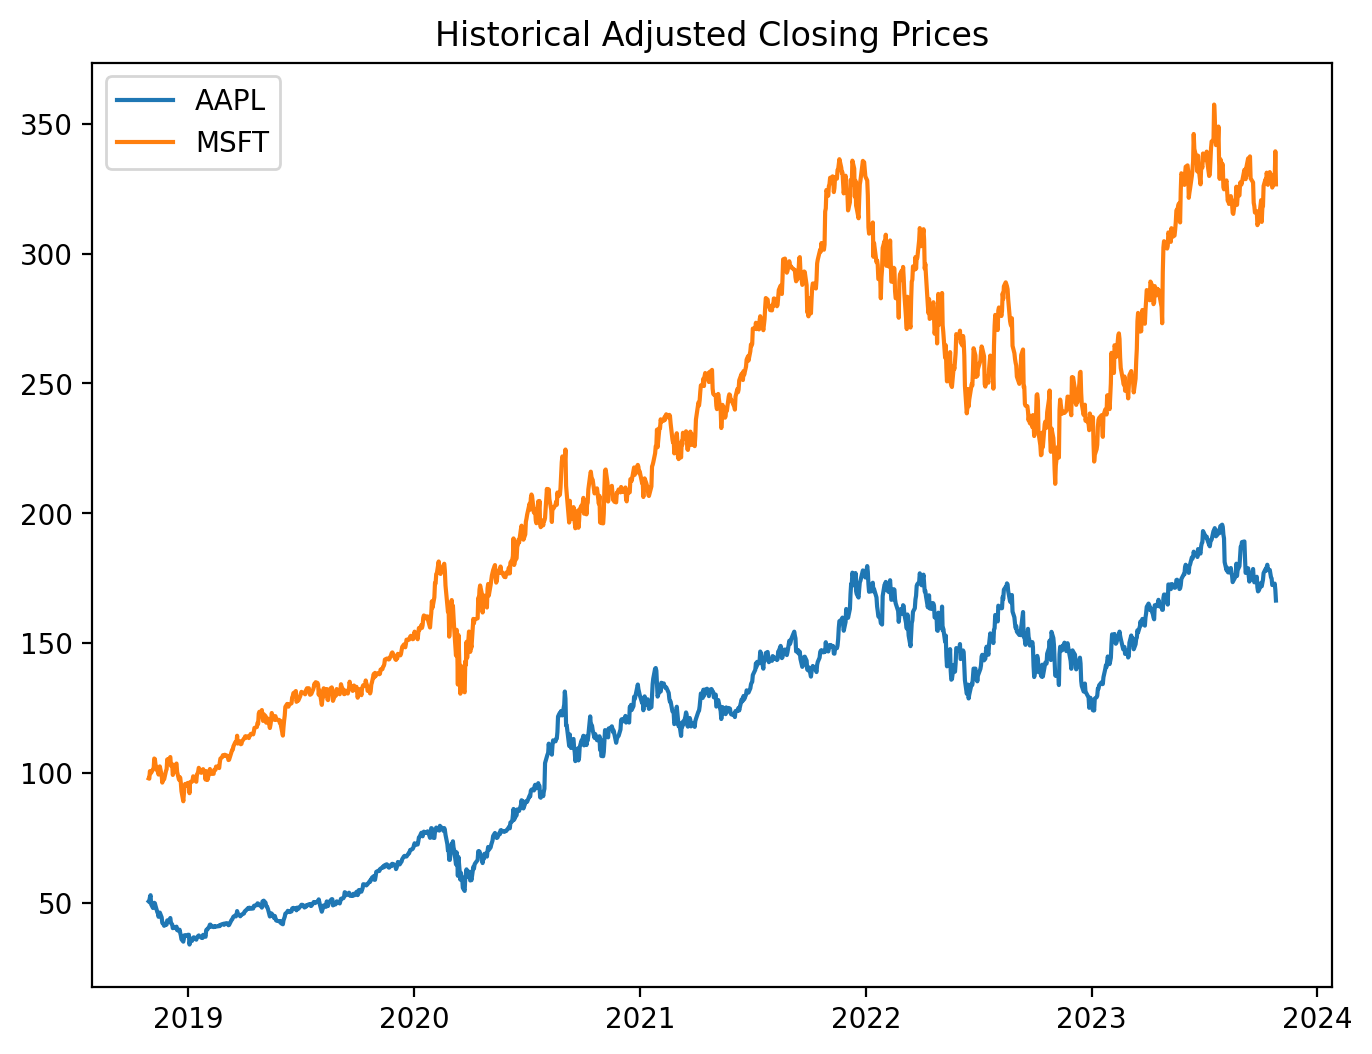

In [13]:
figure(figsize=(8, 6), dpi=200)
AAPL = d['AAPL']
MSFT = d['MSFT']
plt.plot(AAPL, label = "AAPL")
plt.plot(MSFT, label = "MSFT")
plt.title('Historical Adjusted Closing Prices')
plt.legend()

Text(0.5, 1.0, 'Spread between Pepsi and Coca Cola')

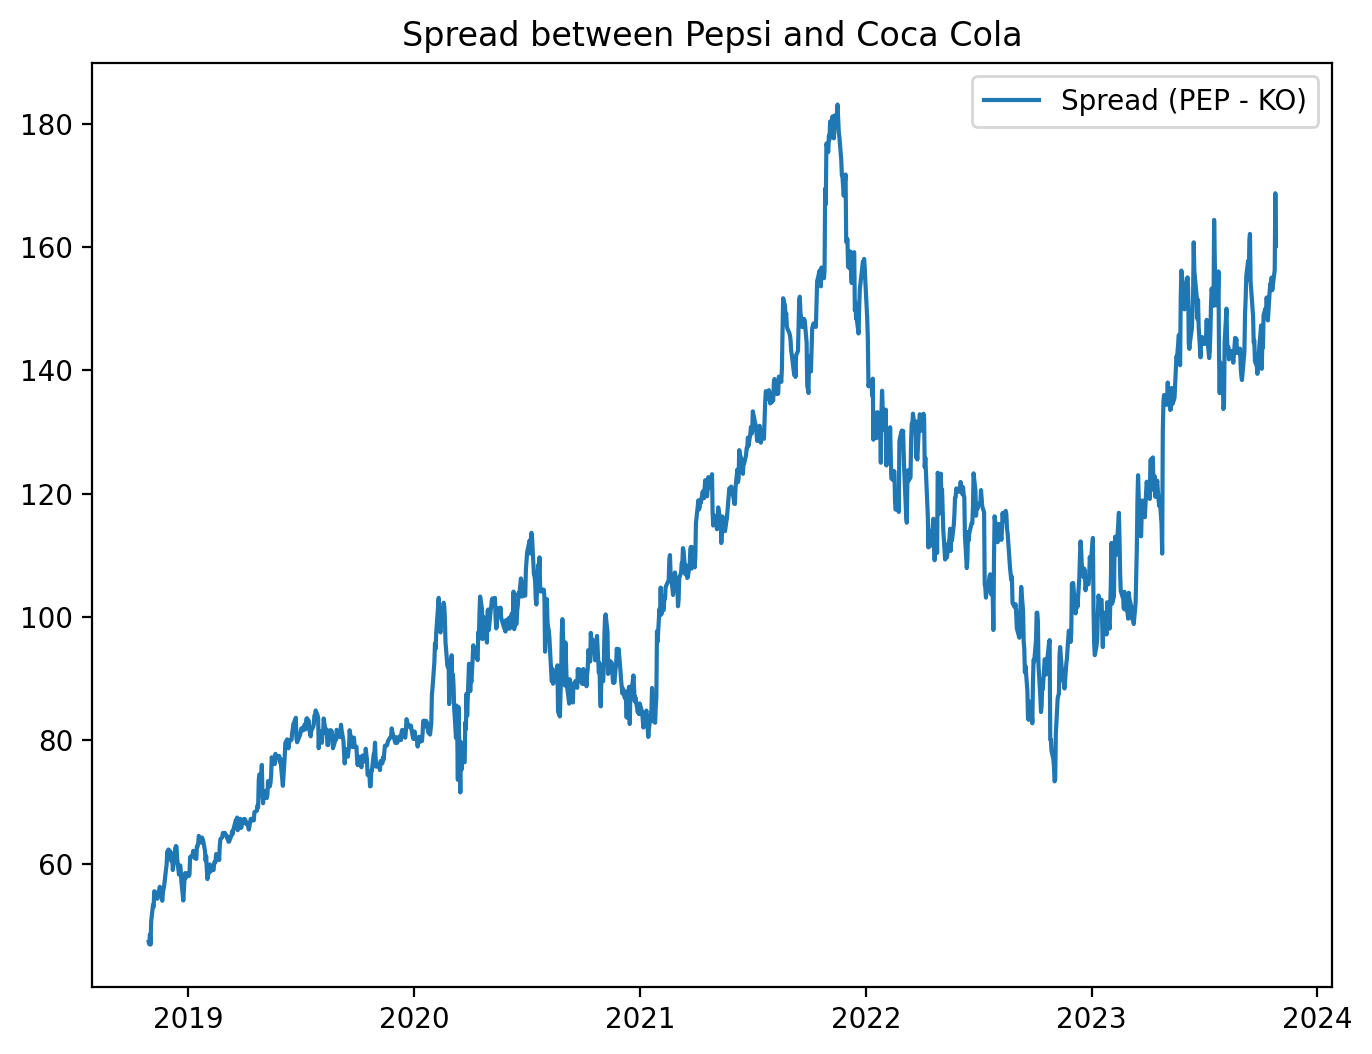

In [14]:
figure(figsize=(8, 6), dpi=200)
plt.plot(MSFT - AAPL, label = 'Spread (PEP - KO)')
plt.legend()
plt.title("Spread between Pepsi and Coca Cola")

### Cointegration & Stationarity Tests

In [15]:
result = ts.coint(PEP, KO)
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

P value for the augmented Engle-Granger two-step cointegration test is 0.29752709241950315


In [18]:
AAPL_ADF = adfuller(AAPL)
print('P value for the Augmented Dickey-Fuller Test is', AAPL_ADF[1])
MSFT_ADF = adfuller(MSFT)
print('P value for the Augmented Dickey-Fuller Test is', MSFT_ADF[1])
Spread_ADF = adfuller(MSFT - AAPL)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(MSFT / AAPL)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])

P value for the Augmented Dickey-Fuller Test is 0.708320460786005
P value for the Augmented Dickey-Fuller Test is 0.730475981962361
P value for the Augmented Dickey-Fuller Test is 0.6189127486924411
P value for the Augmented Dickey-Fuller Test is 0.4919301299086315


Text(0.5, 1.0, 'Price Ratio between MSFT and AAPL')

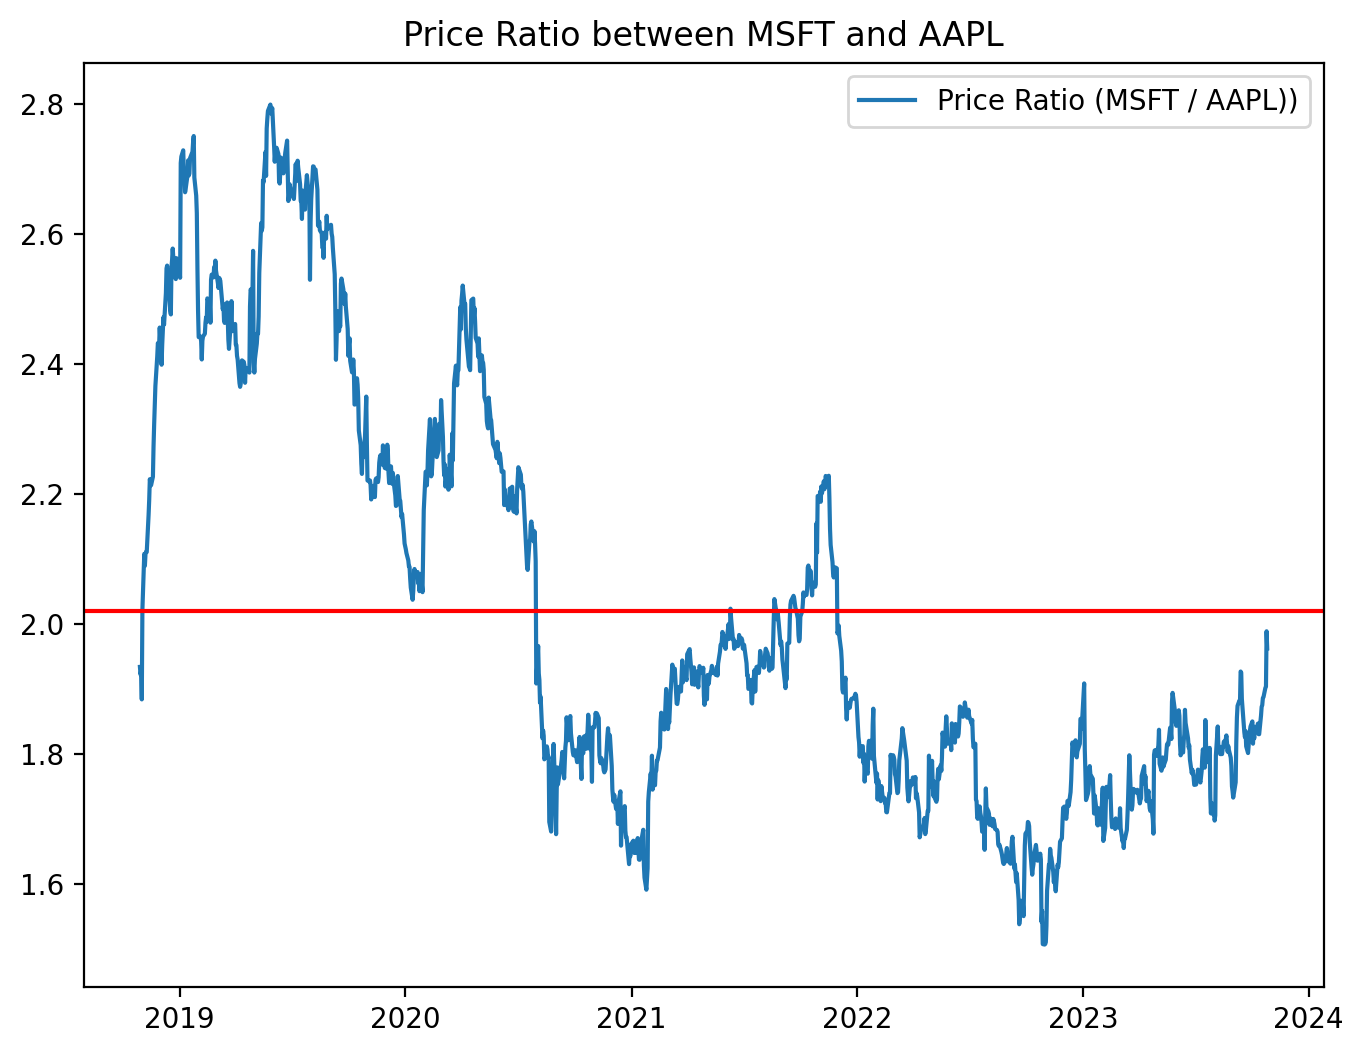

In [19]:
figure(figsize=(8, 6), dpi=200)
ratio = MSFT / AAPL
plt.plot(ratio, label = 'Price Ratio (MSFT / AAPL))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between MSFT and AAPL")

### Z Score

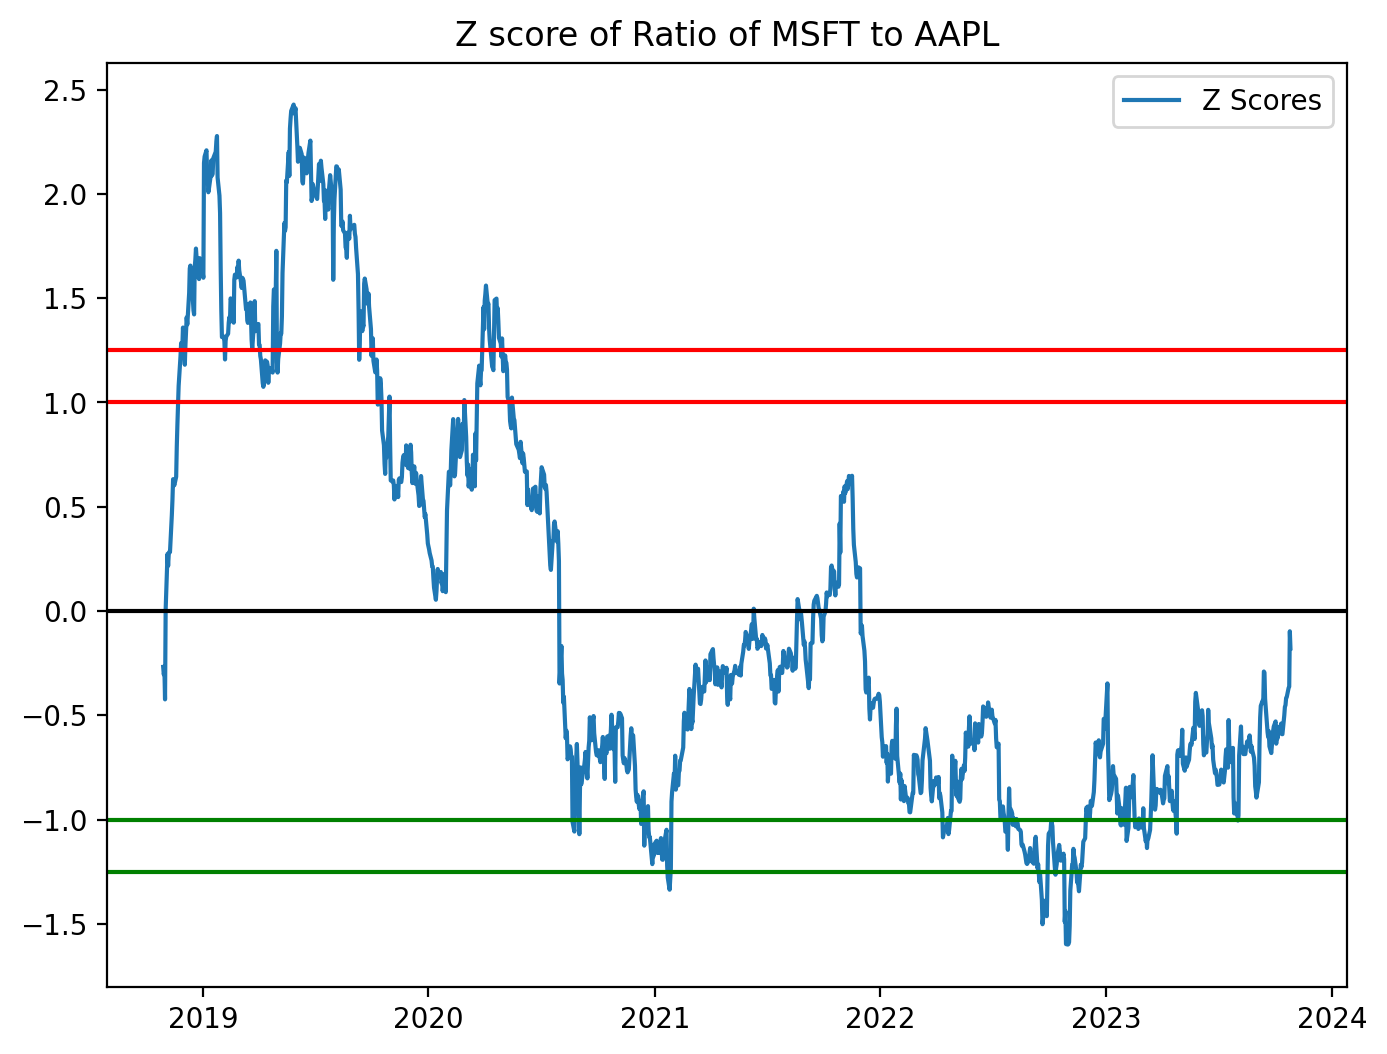

In [20]:
figure(figsize=(8, 6), dpi=200)
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of MSFT to AAPL')
plt.show()

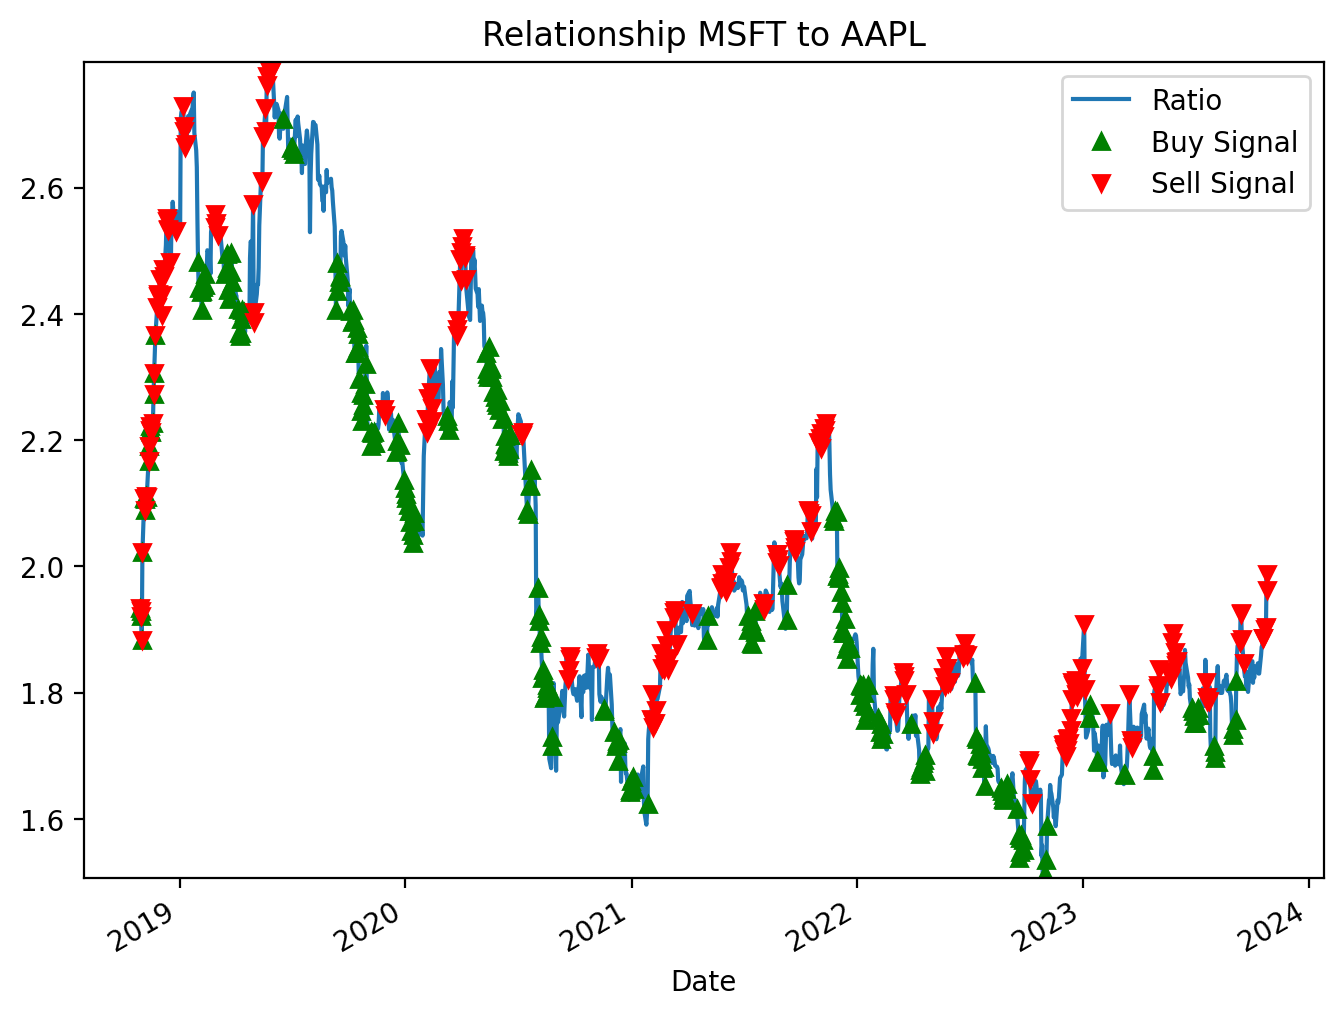

In [24]:
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20

figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='v')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship MSFT to AAPL')
plt.show()

In [1]:
# Credit by Edoardo Alberto Donolato